# Linear regression module

The Midgard **math.linear_regression** module provides linear regression functionality by using python module **statsmodels**. 


## Use linear_regression module

The `statsmodels` module is used for the **LinearRegression** class of the `linear_regression` module. 

Outlier can be rejected beside normal linear regression 
analysis. Hereby a linear regression analysis is carried out, whereby a linear trend is estimated of the given data.
The root-mean square (RMS) of the residuals (observation - linear trend) is used to detect outliers. As default
the following outlier limit is defined: 
    
    limit = outlier_limit_factor * RMS   (with outlier_limit_factor=1.0)
    
The `outlier_limit_factor` can be chosen as argument by initialization of a LinearRegression class object. In addition
the number of iteration for the outlier detection can be chosen with the argument `outlier_iteration`. 

Following arguments can be chosen by initialization of **LinearRegression** class objects:

| Attribute             | Type       | Description                                                           |
|:----------------------| :----------| :---------------------------------------------------------------------|
| outlier_limit_factor  | float      | RMS of residuals are used for detecting outliers, whereby             |
|                       |            | 'outlier_limit_factor' * 'RMS' is used as limit. As default is        |
|                       |            | 'outlier_limit_factor' = 1.0 chosen.                                  |
| outlier_iteration     | int        | Number of iteration used to detect and reject outliers. Default is 1. |
| reject_outlier        | bool       | Determine if outliers should be detected and rejected. Default is     |
|                       |            | 'False', which means that no outliers are rejected.                   |
| x                     | np.ndarray | X training data                                                       |
| y                     | np.ndarray | Y target data                                                         | 

Following properties can be chosen by LinearRegression class objects: 

| Properties         | Description                                              |
| :------------------| :--------------------------------------------------------|
| interception       | Interception of regression line                          |
| interception_sigma | Standard deviation of interception of regression line    |
| residuals          | Residuals of regression line (observed - modeled)        |
| rms                | RMS of regression line residuals                         |
| r_square           | Coefficient of determination R^2                         |
| slope              | Slope of regression line                                 |
| slope_sigma        | Standard deviation of slope of regression line           |
| y_modeled          | Modeled y-data for given x-data                          |

An example is shown, how to use the **linear_regression** module. As a first step data and plotting functions are generated, which are used afterwards.

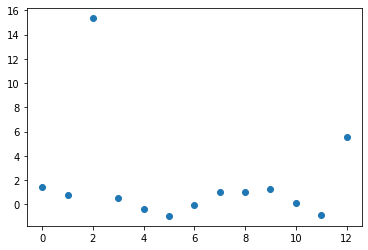

In [1]:
# Import numpy module
import numpy as np

# Import matplotlib module
import matplotlib.pyplot as plt

# Import Midgard LinearRegression class of linear_regression module
from midgard.math.linear_regression import LinearRegression

# Define plotting function
def plot_solution(linreg):
    plt.plot(linreg.x, linreg.y_modeled, label="modeled", color="black")
    plt.scatter(linreg.x,linreg.y, label="observed")
    plt.title(
        f"Interception: {linreg.interception:.2f} +/- {linreg.interception_sigma:.2f}, "
        f"Slope: {linreg.slope:.2f} +/- {linreg.slope_sigma:.2f}, "
        f"RMS: {linreg.rms:.2f}"
    )
    plt.legend()
    plt.show()

def plot_residuals(linreg):
    plt.scatter(linreg.x,linreg.residuals, color="green")
    plt.title(
        f"Residuals (RMS: {linreg.rms:.2f})"
    )
    plt.show()

# Generate test dataset
x=np.linspace(0, 12, 13)
y=np.array([ 1.42274251,  0.76670381,  15.3586775, 0.53375993, -0.35339823, -0.96415597, -0.02571656,  1.02526094,  1.00517286,
  1.2355888 ,  0.11537742, -0.8675229, 5.58370990 ])

# Plot solution
plt.scatter(x,y)
plt.show()

In the following the linear regression analysis is carried out by using the Midgard **linear_regression** module.

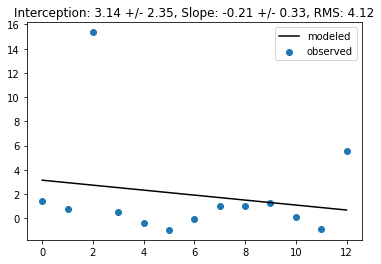

In [2]:
# Import Midgard LinearRegression class of linear_regression module
from midgard.math.linear_regression import LinearRegression

# Generate LinearRegression object
linreg = LinearRegression(x,y)
  
# Plot solution
plot_solution(linreg)

The **linear_regression** module provides also functionality for rejecting outliers. This is shown in the following. 

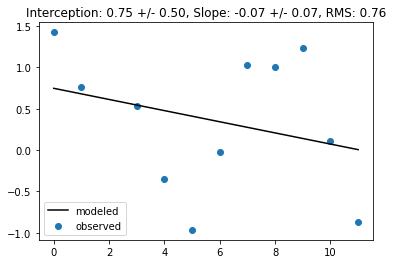

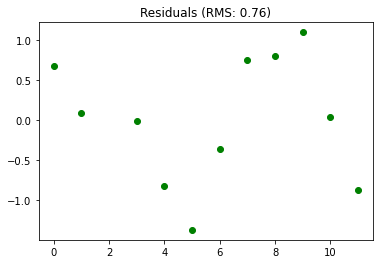

In [3]:
# Generate LinearRegression object with configuration for rejecting outliers
linreg = LinearRegression(
                x,
                y,
                reject_outlier=True,
)

# Plot solution
plot_solution(linreg)

# Plot residuals
plot_residuals(linreg)

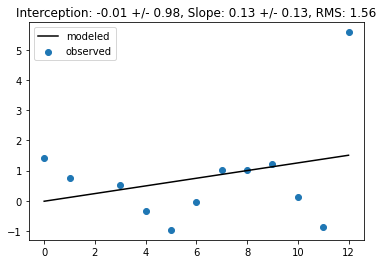

In [4]:
# Generate LinearRegression object with configuration for rejecting outliers and 
# changing RMS outlier limit factor
linreg = LinearRegression(
            x,
            y,
            reject_outlier=True, 
            outlier_limit_factor=2.0,
)

# Plot solution
plot_solution(linreg)

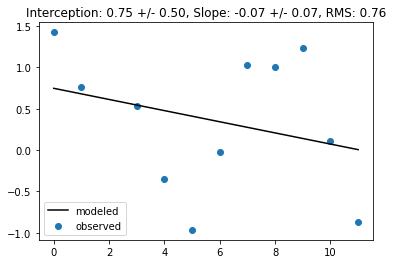

In [5]:
# Generate LinearRegression object with configuration for rejecting outliers and 
# changing RMS outlier limit factor and number of iterations
linreg = LinearRegression(
            x,
            y,
            reject_outlier=True, 
            outlier_limit_factor=2.0,
            outlier_iteration=2,
)

# Plot solution
plot_solution(linreg)